In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import os
from dv import AedatFile
import matplotlib.pyplot as plt
from matplotlib import animation 
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import DBSCAN
import seaborn as sns

In [2]:
def read_aedat_file(path):
    with AedatFile(path) as f:
        events = np.hstack([packet for packet in f['events'].numpy()])
        timestamps, x, y, polarities = events['timestamp'], events['x'], events['y'], events['polarity']
        #event_test = events[:FRAME]
        return events

In [3]:
test = read_aedat_file('./predata/newdata.aedat4')

In [4]:
df=pd.DataFrame(test)
df

,timestamp,x,y,polarity,_p1,_p2
0,1631582148594939,207,256,0,0,0
1,1631582148594953,132,241,1,0,0
2,1631582148594967,304,141,0,0,0
3,1631582148594969,65,74,1,0,0
4,1631582148594972,114,240,1,0,0
...,...,...,...,...,...,...
1381006,1631582159194696,320,35,0,0,0
1381007,1631582159194714,70,46,1,0,0
1381008,1631582159194805,101,251,1,0,0
1381009,1631582159194819,174,35,1,0,0


In [5]:
def timestamp_zeroization(events):
    temp = events['timestamp'][0]
    for i in range(0,len(events['timestamp'])):
        events['timestamp'][i]-=temp

In [6]:
timestamp_zeroization(test)
df2=pd.DataFrame(test)
df2

,timestamp,x,y,polarity,_p1,_p2
0,0,207,256,0,0,0
1,14,132,241,1,0,0
2,28,304,141,0,0,0
3,30,65,74,1,0,0
4,33,114,240,1,0,0
...,...,...,...,...,...,...
1381006,10599757,320,35,0,0,0
1381007,10599775,70,46,1,0,0
1381008,10599866,101,251,1,0,0
1381009,10599880,174,35,1,0,0


In [7]:
def cut_frame(events,start_time=0,frame_size=20000):
    
    end_condition = events['timestamp'] <= start_time+frame_size
    start_condition = events['timestamp'] >= start_time

    target_df = events[end_condition & start_condition]
    return target_df

In [8]:
frame = cut_frame(df2)

In [9]:
frame

,timestamp,x,y,polarity,_p1,_p2
0,0,207,256,0,0,0
1,14,132,241,1,0,0
2,28,304,141,0,0,0
3,30,65,74,1,0,0
4,33,114,240,1,0,0
...,...,...,...,...,...,...
3575,19977,320,96,0,0,0
3576,19985,142,250,0,0,0
3577,19991,68,76,1,0,0
3578,19995,64,62,1,0,0


In [10]:
def time_nomalization(frame,frame_size=20000):
    temp=frame_size/300
    cpy=frame
    print(temp)
    for i in range(len(frame)):
        frame['timestamp'][i] = cpy['timestamp'][i]/temp
    return frame

In [11]:
aa=time_nomalization(frame)

66.66666666666667


C:\Users\sslab\anaconda3\envs\visual\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sslab\anaconda3\envs\visual\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
aa

,timestamp,x,y,polarity,_p1,_p2
0,0,207,256,0,0,0
1,0,132,241,1,0,0
2,0,304,141,0,0,0
3,0,65,74,1,0,0
4,0,114,240,1,0,0
...,...,...,...,...,...,...
3575,299,320,96,0,0,0
3576,299,142,250,0,0,0
3577,299,68,76,1,0,0
3578,299,64,62,1,0,0


In [13]:
frame

,timestamp,x,y,polarity,_p1,_p2
0,0,207,256,0,0,0
1,0,132,241,1,0,0
2,0,304,141,0,0,0
3,0,65,74,1,0,0
4,0,114,240,1,0,0
...,...,...,...,...,...,...
3575,299,320,96,0,0,0
3576,299,142,250,0,0,0
3577,299,68,76,1,0,0
3578,299,64,62,1,0,0


In [14]:
feature = frame[['x','y','timestamp','polarity']]
feature['timestamp'][0]

0

In [15]:
feature

,x,y,timestamp,polarity
0,207,256,0,0
1,132,241,0,1
2,304,141,0,0
3,65,74,0,1
4,114,240,0,1
...,...,...,...,...
3575,320,96,299,0
3576,142,250,299,0
3577,68,76,299,1
3578,64,62,299,1


In [23]:
eps=30
min_samples=100

model = DBSCAN(eps=eps,min_samples=min_samples)

predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

<IPython.core.display.Javascript object>


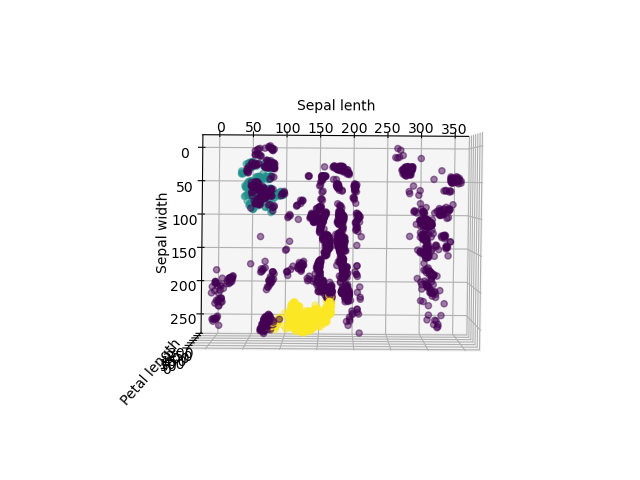

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(r['x'],r['y'],r['timestamp'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

In [18]:
pd.set_option('display.max_rows', None)
r['predict']

0      -1
1       0
2       2
3       1
4       0
5       0
6       0
7       0
8      -1
9       1
10      1
11      0
12      0
13     -1
14      1
15      1
16      1
17      0
18      1
19      1
20      0
21      0
22      0
23      1
24      0
25      0
26      2
27      1
28      0
29      1
30      1
31      0
32      0
33     -1
34      0
35      0
36      0
37      0
38     -1
39      1
40      1
41      2
42      1
43      1
44      1
45      0
46     -1
47      1
48      0
49      0
50     -1
51      0
52      0
53     -1
54      3
55      0
56      0
57      1
58      0
59      1
60      0
61     -1
62     -1
63      0
64      1
65      1
66      1
67      0
68      1
69      1
70      0
71      0
72      1
73      1
74      0
75     -1
76      3
77     -1
78     -1
79      0
80      3
81      0
82      1
83     -1
84      2
85     -1
86      0
87      0
88      1
89      0
90      0
91      2
92      0
93      0
94      0
95     -1
96      1
97      0
98      0
99      0
